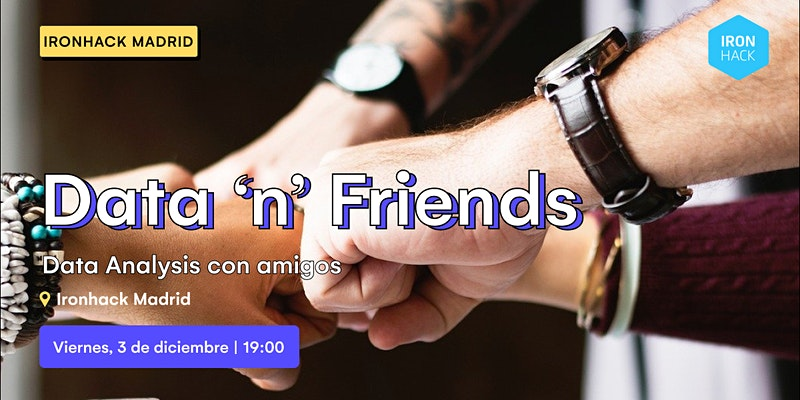





In [1]:
import pandas as pd
import requests
import seaborn as sns

In [2]:
# Hacemos algunas configuraciones 
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

**¿Qué pasó en el Titanic?**.   

Lo bueno de ser Data Analyst es que podemos entender un conjunto de datos en profundidad sin ni si quiera llegar a ver todos los registros de una tabla ¿cómo hacemos eso? Con unas pocas líneas de código ¿te atreves a descubrirlo? ¡Vamos! 🚀

In [3]:
titanic=sns.load_dataset("titanic")

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Cargamos un dataset y podemos ver de un solo vistazo que tratamos con 891 personas registradas y tenemos 15 columnas de características con información sobre su viaje....

In [5]:
titanic.shape

(891, 15)

¿Cuánta gente sobrevivió?

In [6]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [8]:
titanic.survived.value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: survived, dtype: float64

¿Cúantos hombres y mujeres había? No solo podemos contarlos, si no que además podemos verlo de un vistazo con una simple línea de código.

In [9]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

Y podemos saber cuántos hombres y mujeres sobrevivieron y murieron....

In [10]:
titanic.groupby(["sex", "survived"])["who"].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: who, dtype: int64

Pero queremos ver todo esto de un vistazo....

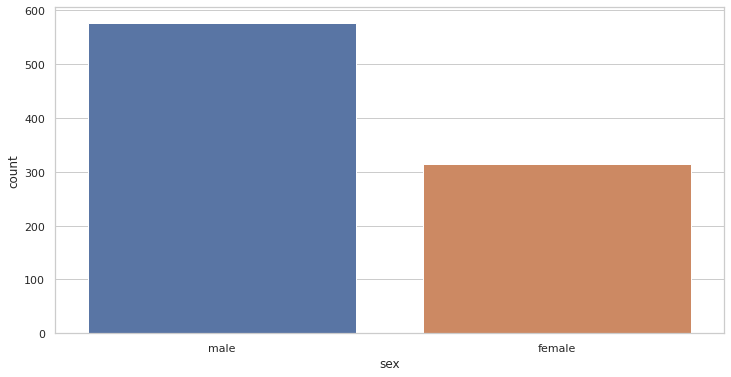

In [11]:
sns.countplot(x=titanic.sex)

¿En qué clase viajaban esos hombres y mujeres?

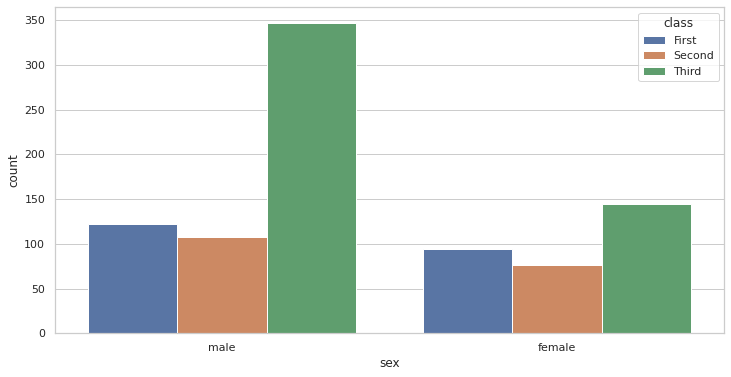

In [12]:
sns.countplot(x="sex", hue="class", data=titanic)

Supervivientes de un vistazo....

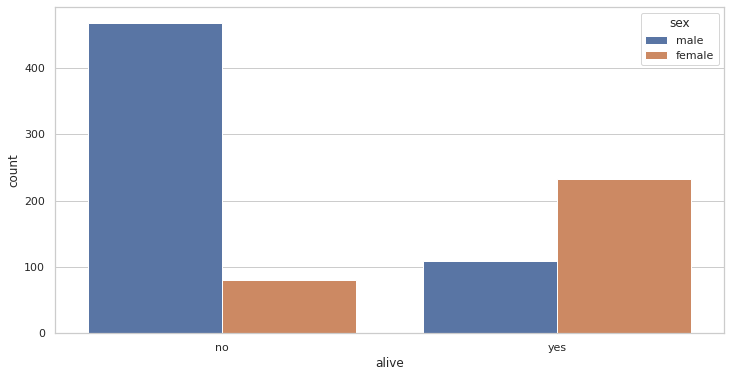

In [13]:
sns.countplot(x="alive", hue="sex", data=titanic)

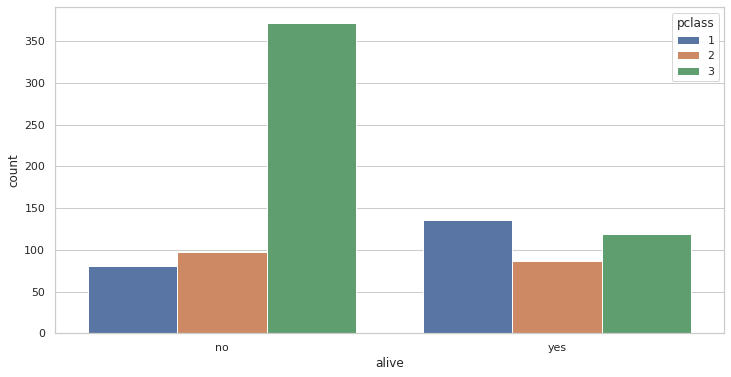

In [14]:
sns.countplot(x="alive", hue="pclass", data=titanic)

**¿Qué edades tenían?**

Esto es un histograma....¿qué es un histograma?

Un histograma es la representación gráfica en forma de barras, que simboliza la distribución de un conjunto de datos. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua.



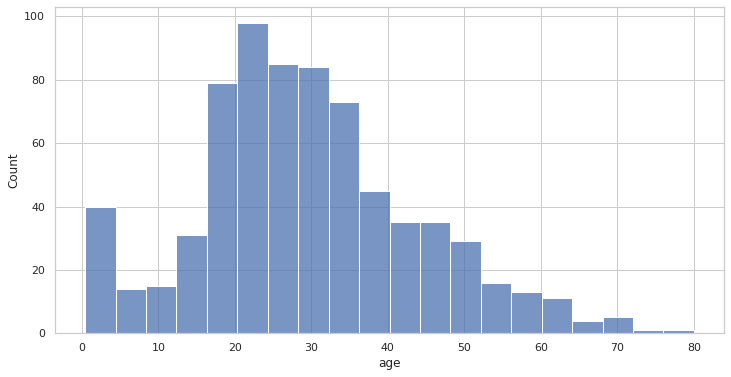

In [15]:
sns.histplot(x=titanic.age)

Fijaos en la distribución de las edades y la clase en la que viajaban....

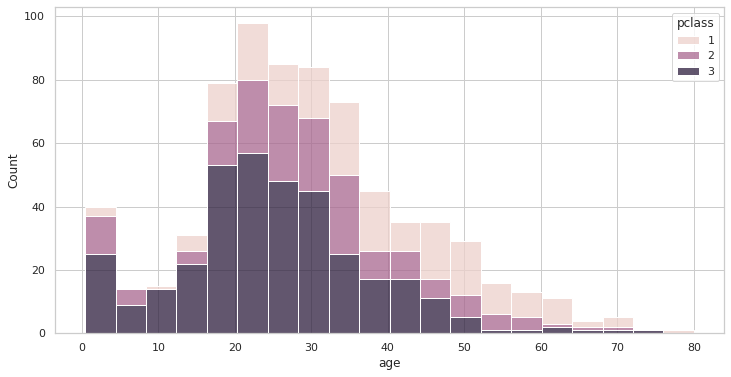

In [16]:
sns.histplot(data=titanic, x="age", hue="pclass", multiple="stack")

In [17]:
import plotly.express as px
import plotly.graph_objects as go

In [18]:
fig = px.box(titanic, x="pclass", y="age", color="survived", points="all",  color_discrete_map={1: '#19D3F3', 0: 'red'}, width=1100, height=600) #Points añade los puntos a la izquierda de cada box
fig.show()

Pero **OJO** que... ¡¡esto no es todo!! 
Programando en python se pueden saber cosas súper chulas..... 
Imagínate que se me antoja saber 


**¿dónde está la estación espacial internacional ahora mismo?**

![gif](https://media.giphy.com/media/xT0xeJpnrWC4XWblEk/giphy.gif)



In [19]:
import requests

In [20]:
iss = requests.get("https://api.wheretheiss.at/v1/satellites/25544").json()

In [21]:
iss

{'altitude': 422.90950073817,
 'daynum': 2459552.1553935,
 'footprint': 4522.2361730034,
 'id': 25544,
 'latitude': -14.490306981946,
 'longitude': -95.59642300009,
 'name': 'iss',
 'solar_lat': -22.187869490057,
 'solar_lon': 301.54864330311,
 'timestamp': 1638546226,
 'units': 'kilometers',
 'velocity': 27571.299979706,
 'visibility': 'daylight'}

Y diréis.... pero qué es esto, no entiendo nada....no me has dicho dónde está...
Bueno, tenemos una latitud y una longitud. ¡¡Vamos a buscar dónde está!!

Ok, está bien, vamos a instalar un par de librerías más.....

In [37]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ras")

In [38]:
latlon = [iss['latitude'], iss['longitude']]

In [39]:
print(latlon)

[-14.490306981946, -95.59642300009]


In [40]:
loc = geolocator.reverse(f"{latlon[0]},{latlon[1]}")

In [41]:
#print(loc)

¿Queremos verlo en un mapa?

In [42]:
import folium

In [43]:
mapa = folium.Map(location = latlon, zoom_start=5)

In [45]:
#mapa

In [46]:
icono = folium.Icon(color="blue",
             prefix = "fa",
             icon="rocket",
             icon_color="black",)

In [47]:
datos = {"location": latlon, "tooltip": "La ISS", "icon":icono}

In [48]:
iss_marker = folium.Marker(**datos)

In [49]:
iss_marker.add_to(mapa)

In [76]:
#mapa

In [64]:
datos = []
for n in range(100):
  data = requests.get("https://api.wheretheiss.at/v1/satellites/25544").json()
  datos.append(data)

In [65]:
dataframe = pd.DataFrame(datos)

In [66]:
dataframe.head()

,name,id,latitude,longitude,altitude,velocity,visibility,footprint,timestamp,daynum,solar_lat,solar_lon,units
0,iss,25544,-1.755622,-86.311494,420.964551,27576.281325,daylight,4512.367411,1638546478,2.459552e+06,-22.188268,300.498934,kilometers
1,iss,25544,-1.755622,-86.311494,420.964551,27576.281325,daylight,4512.367411,1638546478,2.459552e+06,-22.188268,300.498934,kilometers
2,iss,25544,-1.755622,-86.311494,420.964551,27576.281325,daylight,4512.367411,1638546478,2.459552e+06,-22.188268,300.498934,kilometers
3,iss,25544,-1.704684,-86.275597,420.960265,27576.296182,daylight,4512.345636,1638546479,2.459552e+06,-22.188270,300.494769,kilometers
4,iss,25544,-1.704684,-86.275597,420.960265,27576.296182,daylight,4512.345636,1638546479,2.459552e+06,-22.188270,300.494769,kilometers


In [67]:
dataframe.shape

(100, 13)

In [68]:
lista = [[fila["latitude"], fila["longitude"]] for _, fila in dataframe.iterrows()]

In [69]:
mapa2 = folium.Map(location = lista[0], zoom_start=5)

In [70]:
ruta = folium.PolyLine(lista, color="orange", weight=2.5, opacity=1).add_to(mapa2)

In [71]:
inicio = {"location": lista[0], "tooltip": "La ISS", "icon":icono}
fin = {"location": lista[1], "tooltip": "La ISS", "icon":icono}

In [72]:
mar_inicio = folium.Marker(**inicio)

In [73]:
mar_inicio.add_to(mapa2)

In [75]:
#mapa2